In [28]:
import pandas as pd

In [16]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

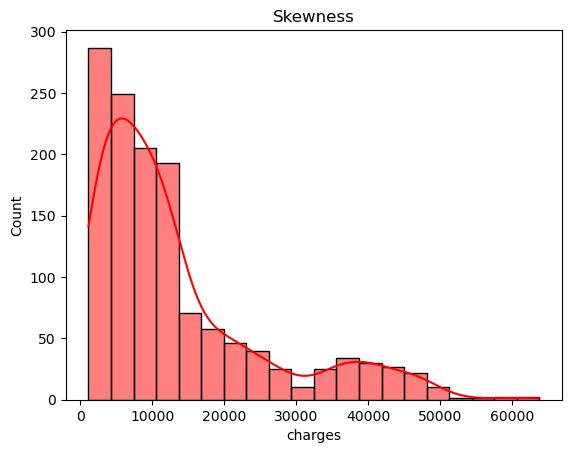

In [18]:
sns.histplot(data['charges'], bins = 20, kde = True, color = 'red') # before transform 
plt.title('Skewness')
plt.show()

In [19]:
# convert skew data into symmetric 
data['log_charges'] = np.log1p(data['charges'])

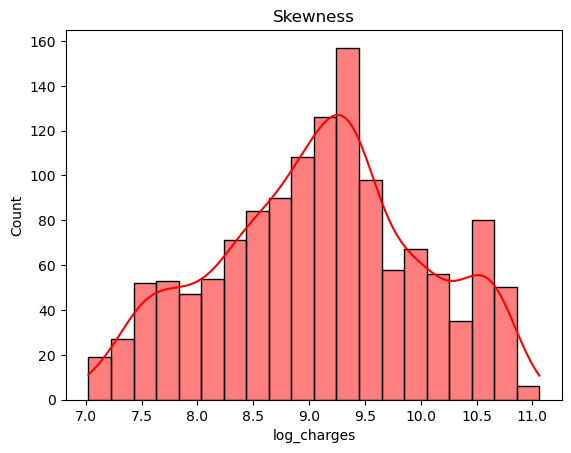

In [20]:
sns.histplot(data['log_charges'], bins = 20, kde = True, color = 'red') # before transform 
plt.title('Skewness')
plt.show()

In [21]:

data.shape

(1338, 8)

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455


In [23]:
from scipy.stats import boxcox
data['boxocx_bmi'], _ = boxcox(data['bmi']+1)

# data['bmi'] + 1 (The Shift) The Box-Cox math cannot handle zero or negative numbers. 
#If your data has a 0 (like a missing entry), the code would crash.By adding 1, you ensure every value is strictly positive so the transformation can work safely. 
# 2. boxcox(...) (The Transformation) This is a mathematical "knob" called Lambda (\(\lambda \)). 
# The function tries different settings to see which one makes your bmi data look the most like a symmetrical bell curve. 
# It might take the square root, the logarithm, or other powers.It automatically picks the "best" setting for you. 
# 3. data['boxocx_bmi'], _ (The Result) The function gives back two things, 
# but you are only keeping the first one: data['boxocx_bmi']: This is your new, transformed BMI data.
# It's now "well-behaved" for machine learning models (like Linear Regression) that expect a normal distribution._: This is a placeholder. 
# The function also gives you the "knob" setting (\(\lambda \)) it used. 
# By using an underscore, you are telling Python: "I don't care about the setting, just give me the transformed data". 

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,boxocx_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,7.763291
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,8.618976
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,8.511576
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,6.920914
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,7.912470


In [25]:
data.shape

(1338, 9)

## Feature Engineering

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,boxocx_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,7.763291
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,8.618976
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,8.511576
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,6.920914
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,7.912470


In [32]:
# creating category as per bmi and age
data['bmi_cat'] = pd.cut(data['bmi'], bins = [0, 18.5, 25, 30, 100], labels = ['under', 'normal', 'over', 'obese'])

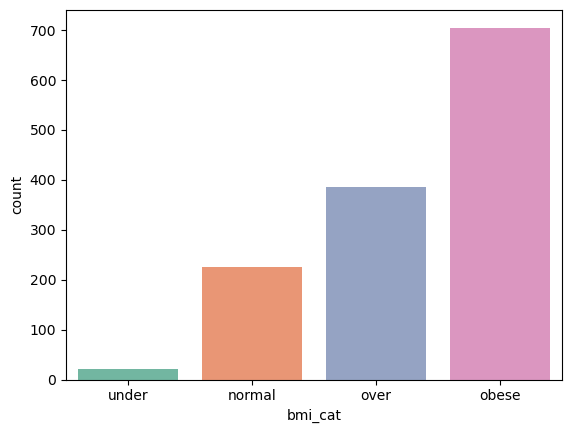

In [37]:
sns.countplot(data, x = 'bmi_cat', hue = 'bmi_cat', palette = 'Set2', label = False)
plt.show()
# creating new column from existing ones, increasing the visualization

In [38]:
data['age_grp'] = pd.cut(data['age'], bins = [0, 18, 30, 60, 100], labels = ['young', 'adult', 'mature', 'senior'])

In [42]:
data['smoker_age'] = data['age']*(data['smoker'] == 'yes')

In [43]:
data.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,boxocx_bmi,bmi_cat,age_grp,smoker_age
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,7.763291,over,adult,19
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,8.618976,obese,young,0
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,8.511576,obese,adult,0
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,6.920914,normal,mature,0
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,7.912470,over,mature,0


## Data Distribution Analysis
#### - Transformed distribution help us better understand data patterns and reduce skewness

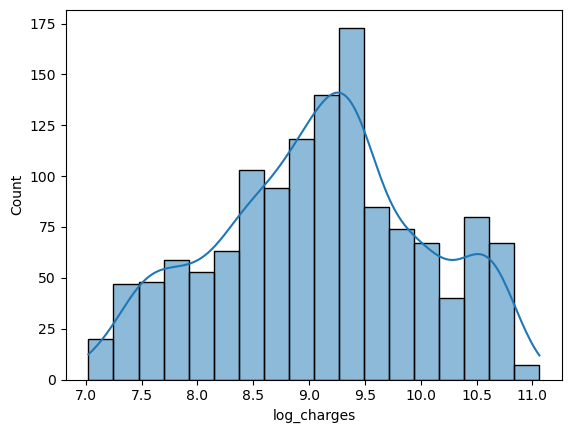

In [51]:
sns.histplot(data['log_charges'], kde = True)
plt.show()

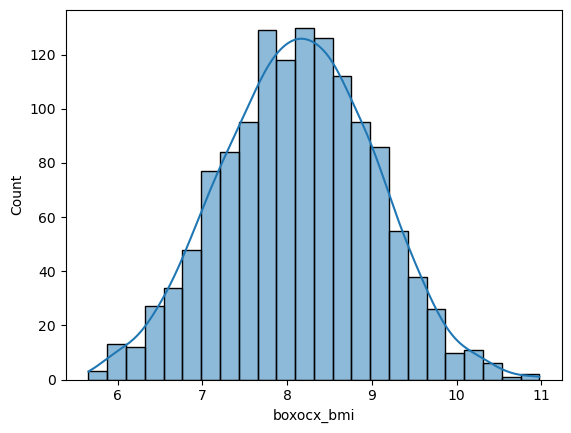

In [52]:
sns.histplot(data['boxocx_bmi'], kde = True)
plt.show()

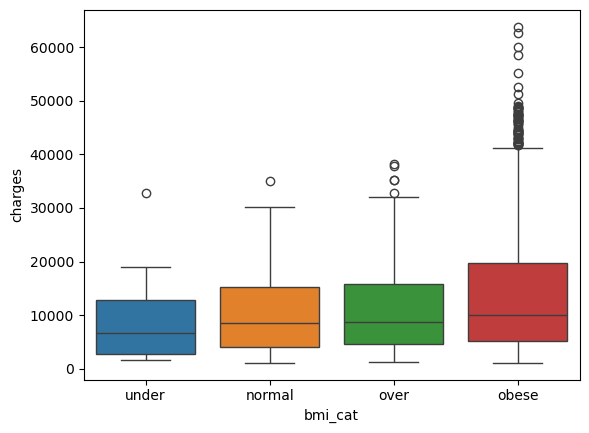

In [62]:
sns.boxplot(data, x = 'bmi_cat', y = 'charges', hue = 'bmi_cat')
plt.show()

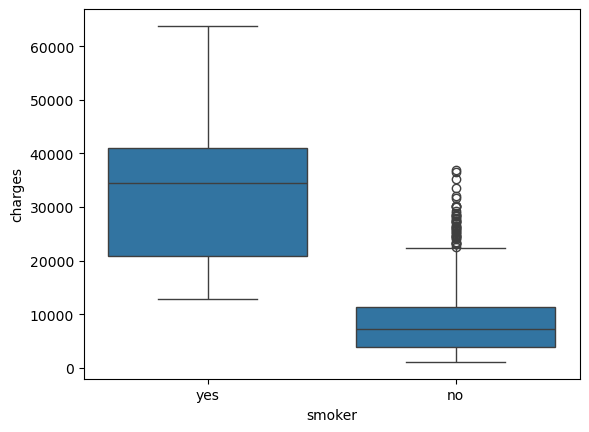

In [63]:
sns.boxplot(data, x = 'smoker', y = 'charges')
plt.show()

In [64]:
# There are more number of outliers in non-smoker than smoker
# Medain value of smoker is larger than non-smoker
#So, the expenses for smoker are significantly more

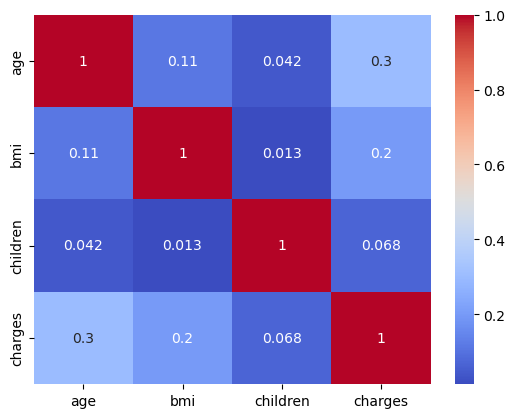

In [67]:
cols = ['age', 'bmi', 'children', 'charges']
sns.heatmap(data[cols].corr(), annot = True, cmap = 'coolwarm')
plt.show()

#### checks unique value for categorical fields

In [68]:
data.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,boxocx_bmi,bmi_cat,age_grp,smoker_age
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,7.763291,over,adult,19
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,8.618976,obese,young,0
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,8.511576,obese,adult,0
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,6.920914,normal,mature,0
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,7.912470,over,mature,0


In [74]:
for cols in ['sex', 'smoker', 'region', 'bmi_cat', 'age_grp']:
    print(data[cols].value_counts())
    print()

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

bmi_cat
obese     705
over      386
normal    226
under      21
Name: count, dtype: int64

age_grp
mature    803
adult     375
senior     91
young      69
Name: count, dtype: int64



## Target Variable Distribution

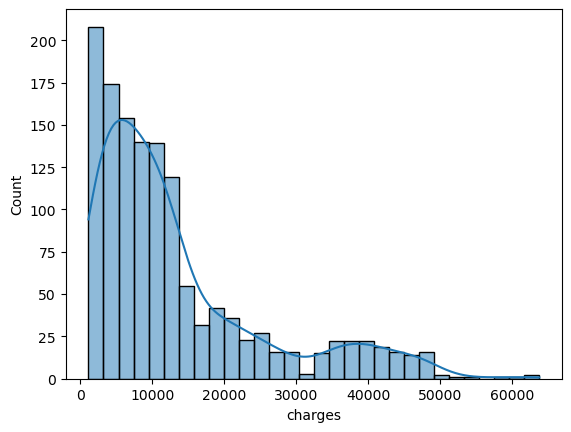

In [77]:
sns.histplot(data['charges'], kde = True)
plt.show()

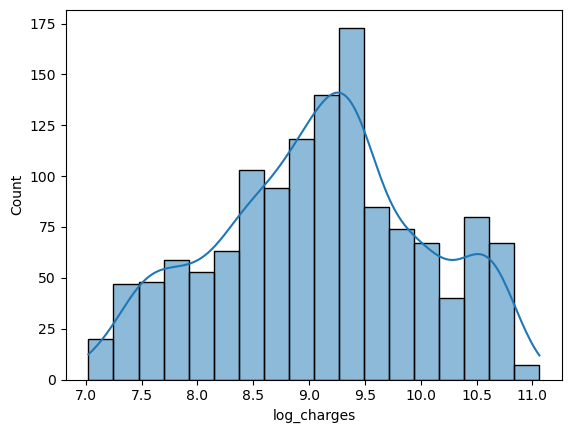

In [78]:
sns.histplot(data['log_charges'], kde = True)
plt.show()

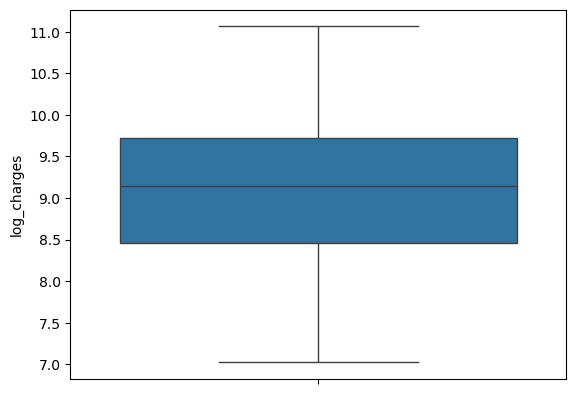

In [81]:
sns.boxplot(y = data['log_charges'])
plt.show()